# PCLab#4 - Group 8 - Yixin He, Yunqi Cao, Jing Wang 
#### 7-8hours

In [1]:
import pandas as pd
import numpy as np

In [2]:
price = pd.read_csv('/Users/a77/Desktop/Finance with big data/pc lab/pc lab 4/Data_PCLab4_Stock_Price.csv')
volume = pd.read_csv('/Users/a77/Desktop/Finance with big data/pc lab/pc lab 4/Data_PCLab4_Stock_Volume.csv')

In [3]:
# Data pre-process
price['Date'] = pd.to_datetime(price['Date']) # Convert the date time
volume['Date'] = pd.to_datetime(volume['Date'])
price.sort_values('Date',inplace=True)        # Sort by the date
volume.sort_values('Date',inplace=True)

# **Task 1**

In [4]:
description = volume.describe()
description

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [5]:
# average trading volume for Apple
print('Avg trading volume for Apple:',round(description.loc['mean','AAPL'],2))

Avg trading volume for Apple: 58203317.42


In [6]:
# maximum trading volume for S&P500
print('Max trading volume(S&P500):',description.loc['max','sp500'])

Max trading volume(S&P500): 9044690000.0


In [7]:
import plotly.express as px

fig = px.line(volume, x='Date', y="sp500", title="Trend of Daily trading volume of sp500")
fig.show()

Comment:equity market volumes have been remarkably high since the end of February 2020 and the volume composition changes as the market moves through the pandemic crisis. After a research we discovered that these extreme volumes in recent weeks of Febbrary are reportedly driven by retail traders, leading to record off-exchange (or TRF) market share. The wall street journal of 9 june 2020: Individuals Roll the Dice on Stocks as Veterans Fret: stuck at home with few entertainment options, more newbies turn to shares; ‘it’s like a gambling game’.

In [8]:
# most traded security (measured by median)
print('Most traded security:',volume.loc[:,'AAPL':'GOOG'].sum(axis=0).sort_values(ascending=False).index[0])

Most traded security: AAPL


Comment: the most traded security is AAPL (Apple) with an average number of shares traded within a day of 58203317.42. This value is an important metric because high or low trade volume attracts different types of traders and investors. Many traders and investors prefer a higher average daily trading volume than a low trading volume, because with a high volume it is easier to get into and out positions. Low-volume assets have fewer buyers and sellers, and therefore it may be more difficult to enter or exit at the desired price. In many cases, a stock becomes most active because there has been a significant change in stock price, such a change is usually due to some newsworthy event. But for the case of Apple we are talking about a stock consistently on the most active list simply because it is popular companies regardless of what is happening with the stock.

In [9]:
import matplotlib.pyplot as plt
import copy
def plot_stocks(data,title):
    index = data['Date']
    fig = plt.figure(figsize=(12,6),dpi=300)
    for stock in data.columns[1:]:
        plt.plot(index,data[stock],label=stock)
    plt.title(title)
    plt.legend()
    plt.show()
    return
def Normalization(data):
    temp = copy.deepcopy(data)
    for stock in temp.columns[1:]:
        norm = temp[stock][0]
        temp[stock] = temp[stock]/norm
    return temp

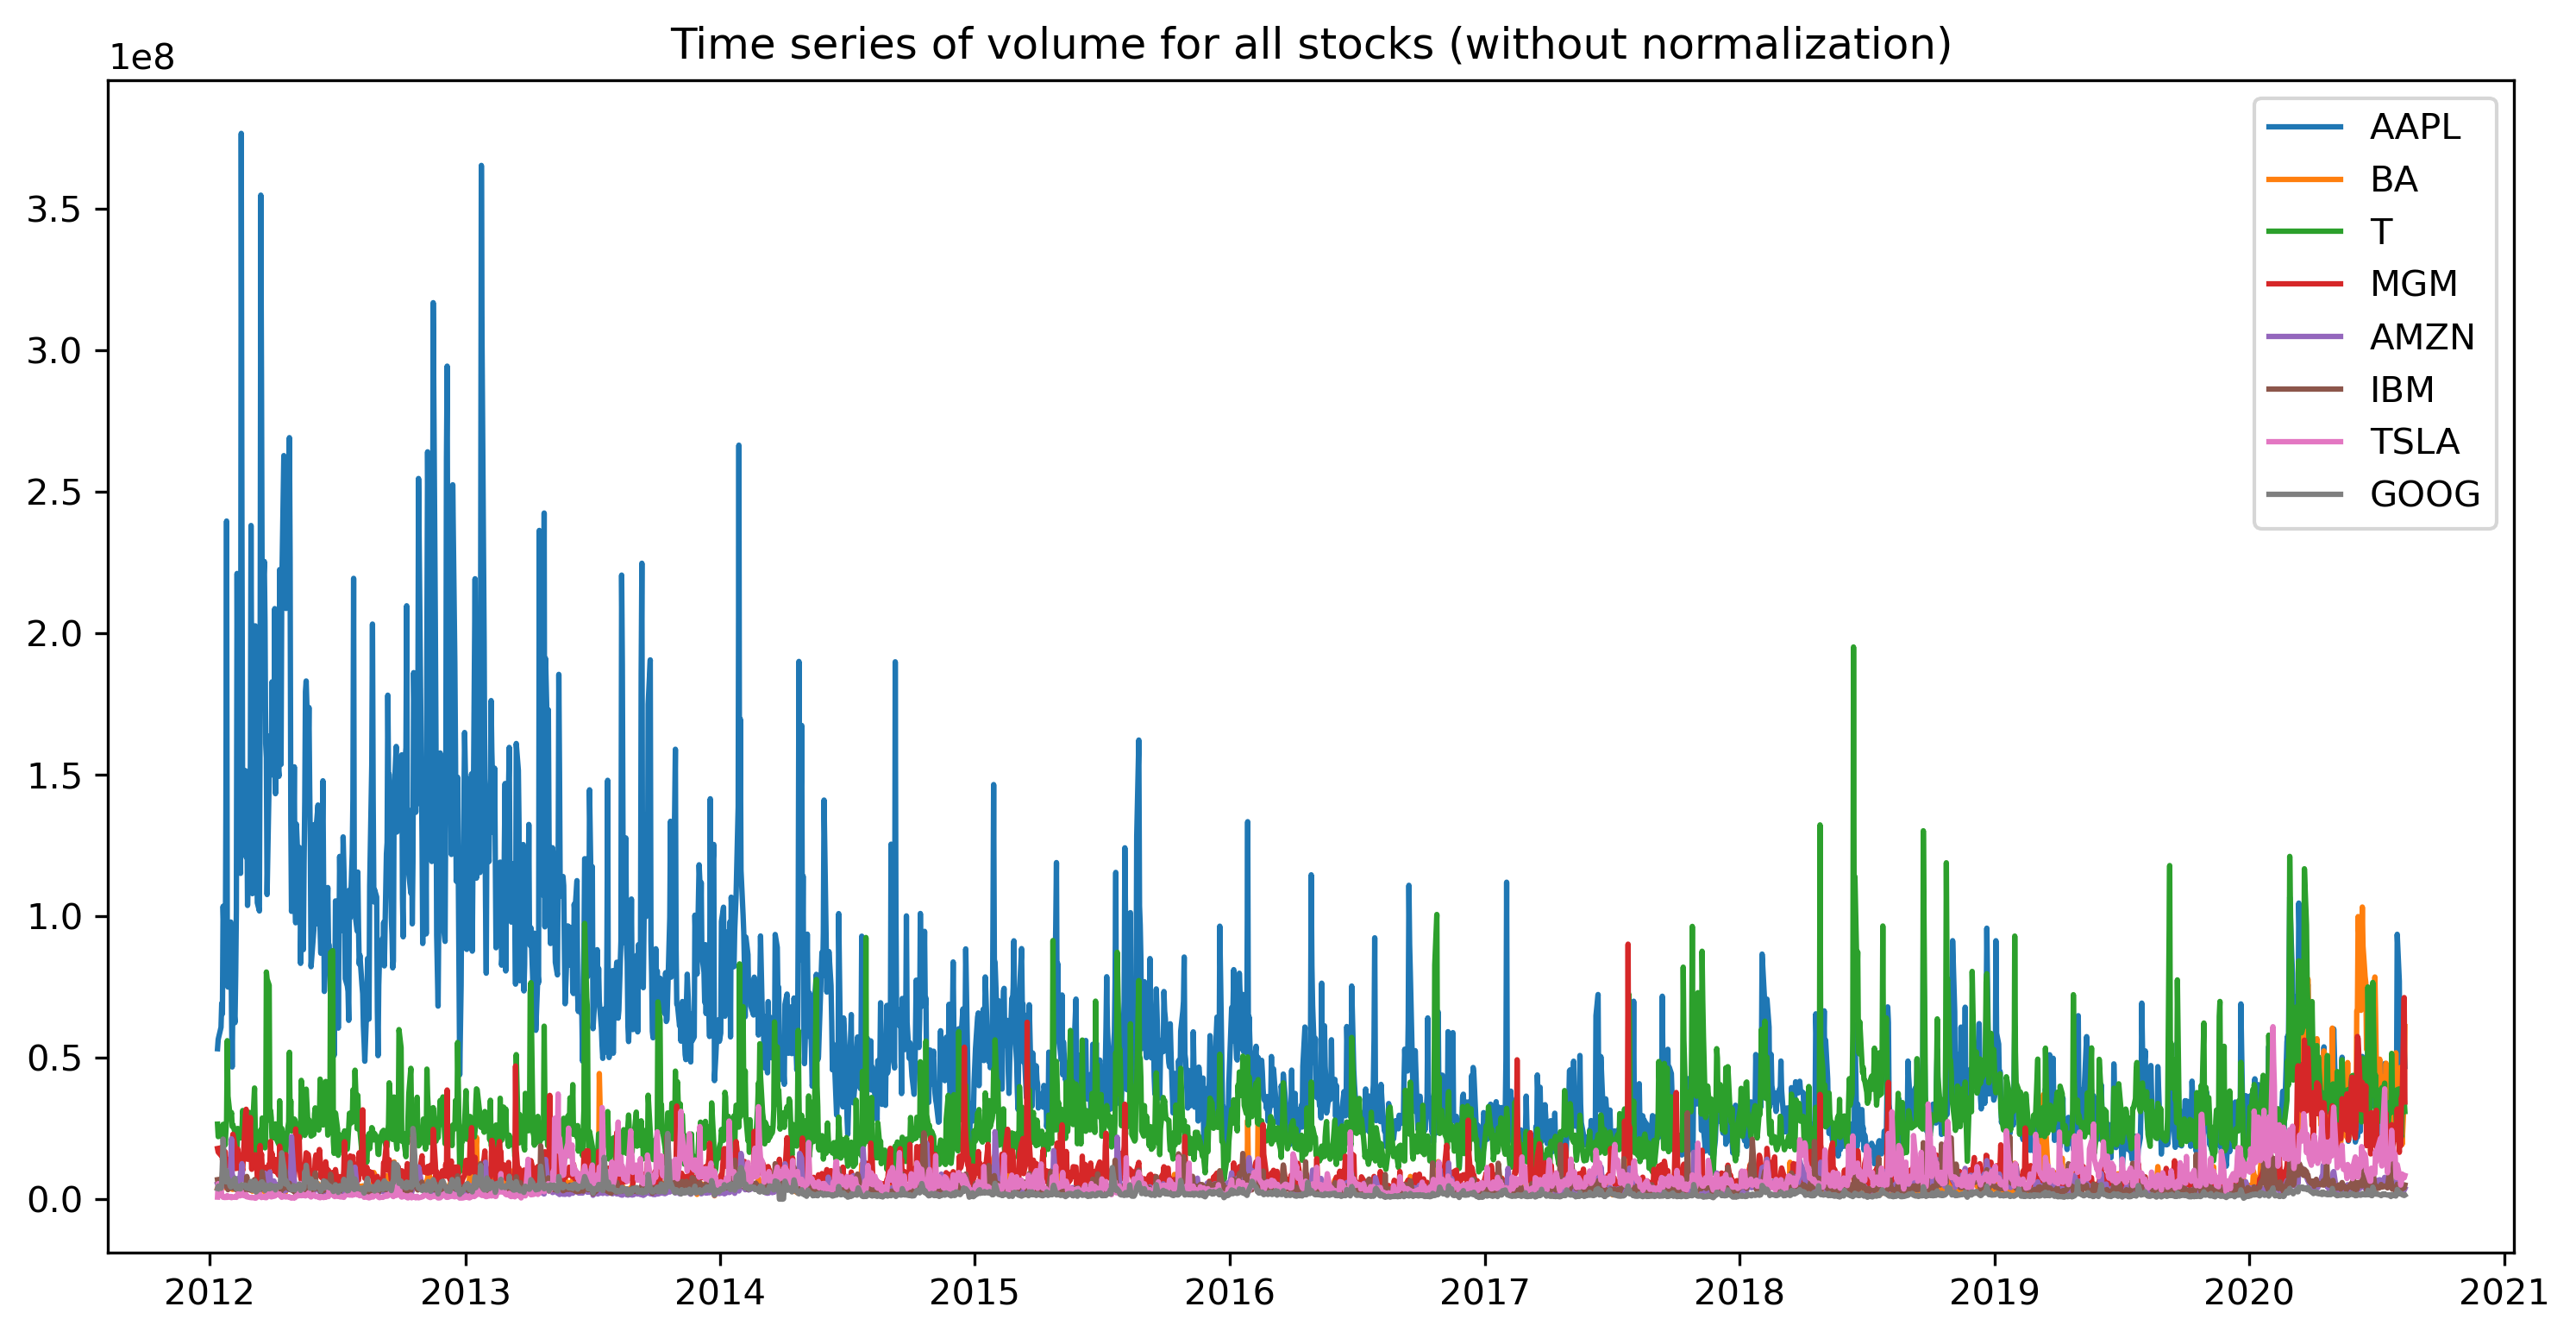

In [10]:
#Plot the time series of volumes for all stocks
volume_withoutsp500=volume.drop(['sp500'],axis=1)
plot_stocks(volume_withoutsp500,'Time series of volume for all stocks (without normalization)')

Comment: here is the daily volume of each stock in a time window of 8 years. As we can observe the stock with the highest stock volume is AAPL (apple) unsurprisingly.

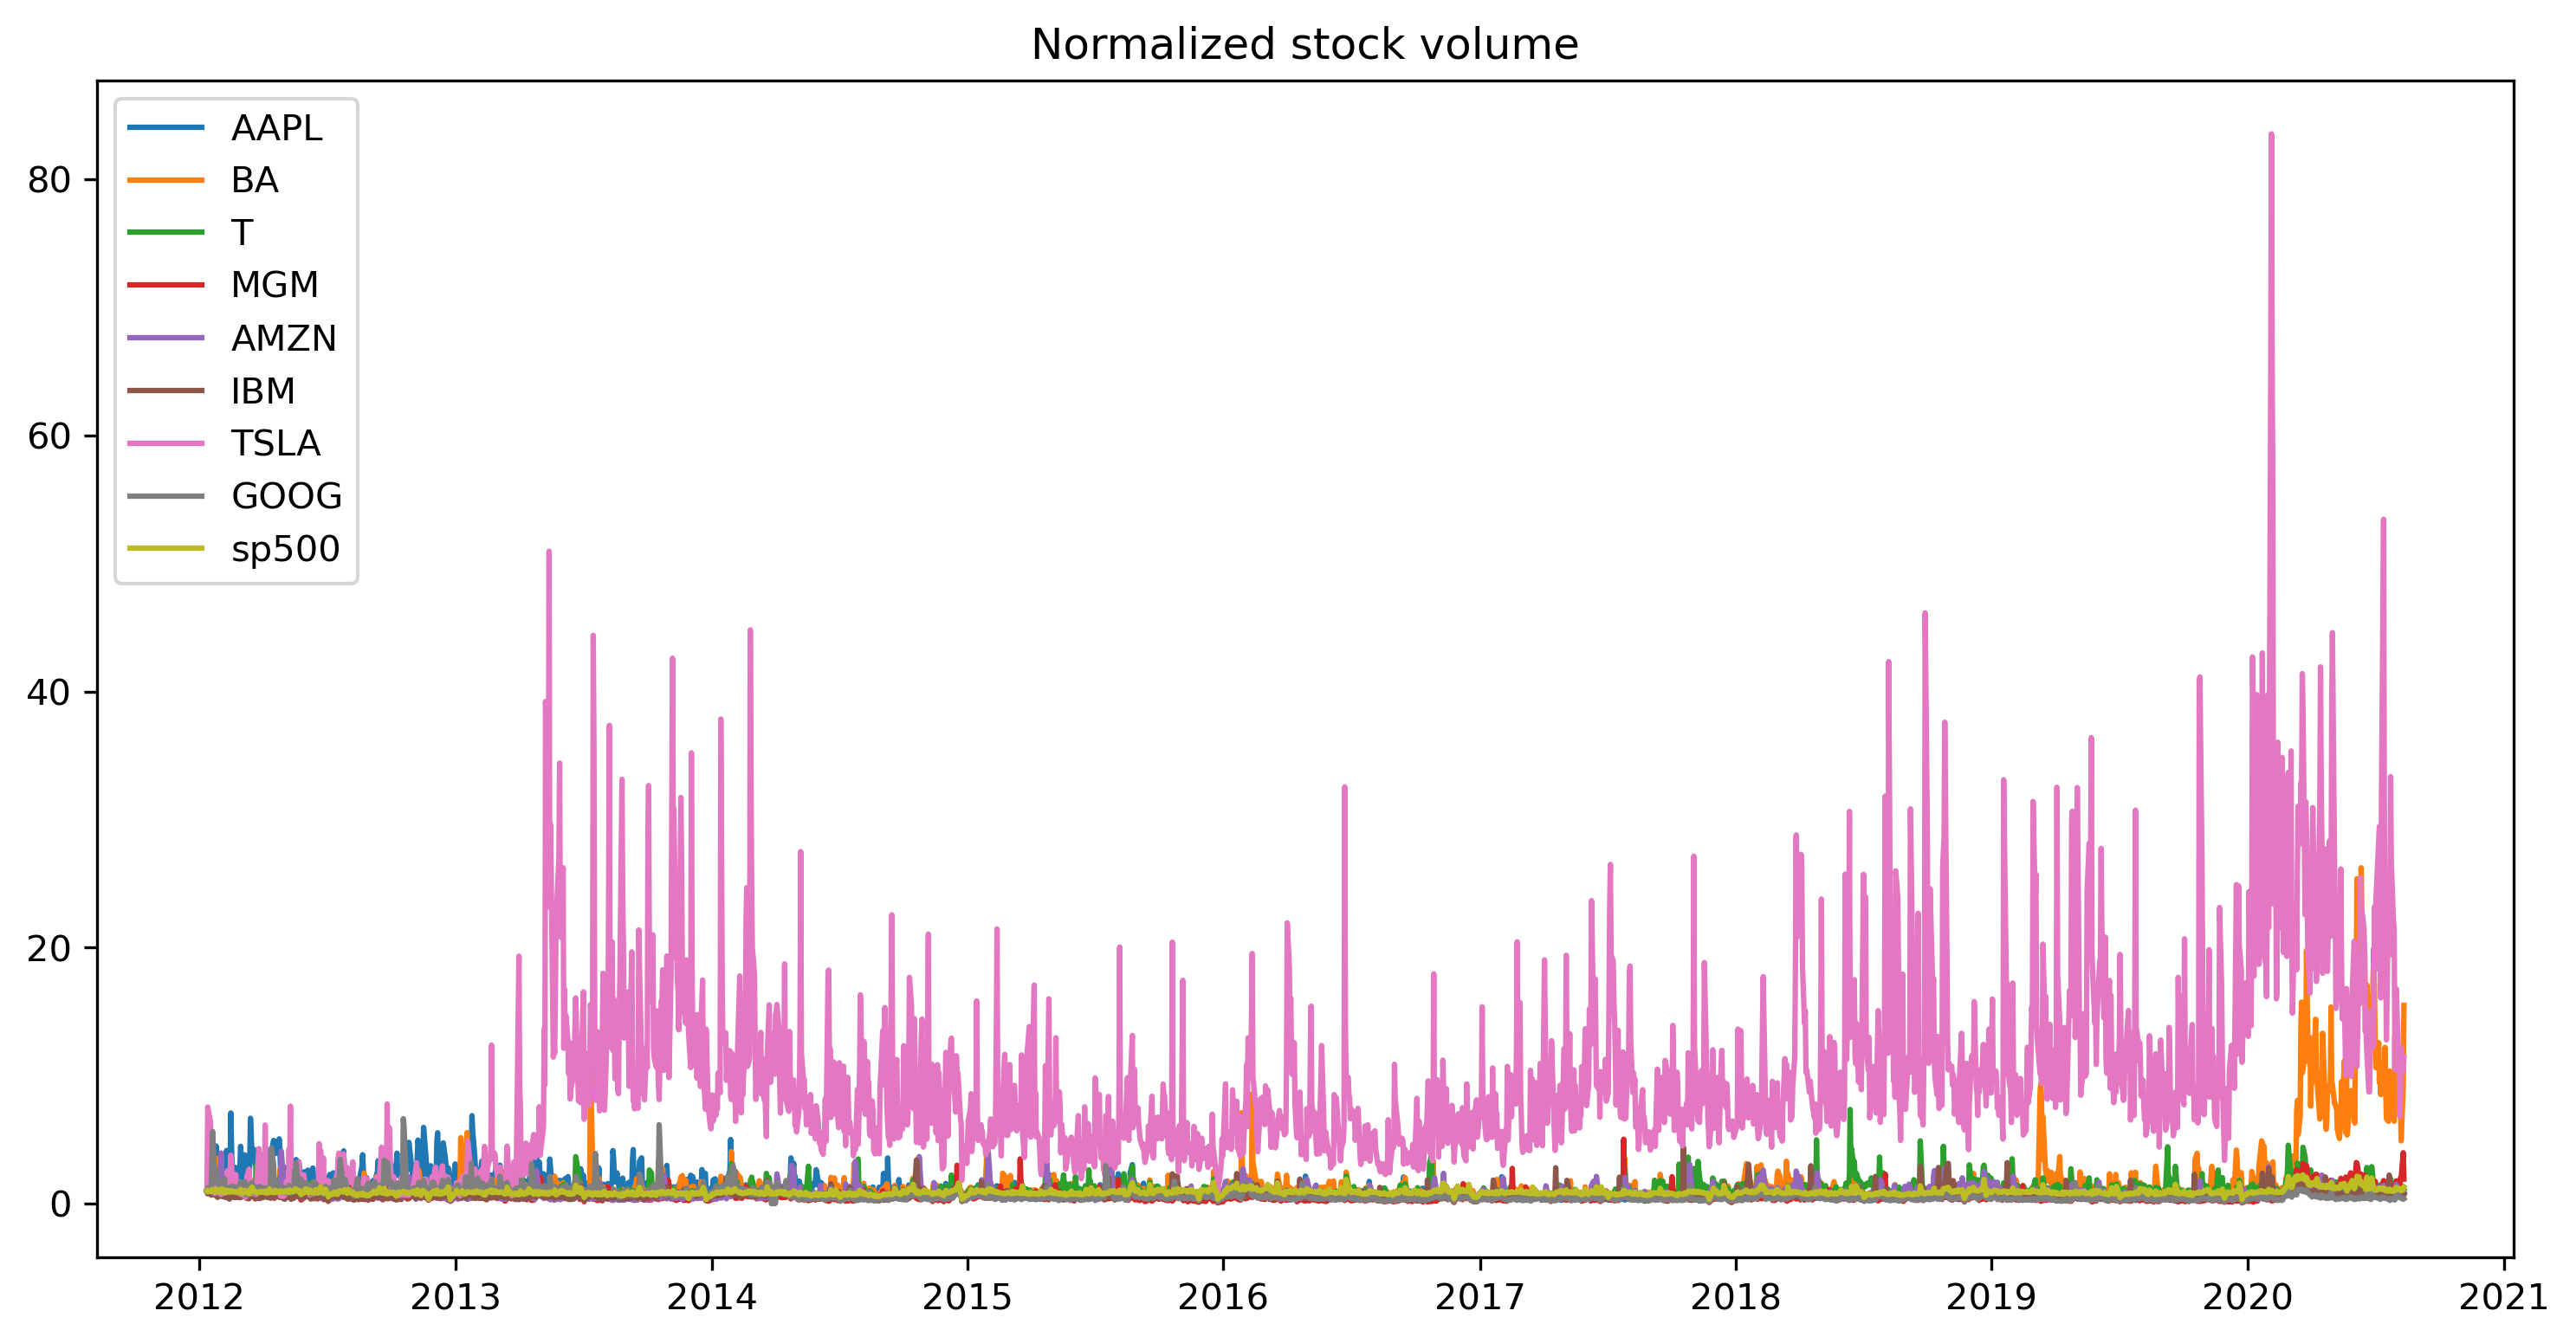

In [11]:
#Plot the time series of volumes with nromalization
volume_N = Normalization(volume)
plot_stocks(volume_N,'Normalized stock volume')

In [12]:
#Relative increse in the trading volume
description.loc['max','TSLA']*100/description.loc['min','TSLA']

16700.137023842148

Comment: instead if we consider the dataset in a normalized way, the stock with the best performance (in term of relative increase in these years) is TSLA (Tesla) which maximum trading volume spiked 16700% from its minimun trading volume.

In [13]:
# Computer the daily function
def daily_return(data):
    prices = data.iloc[:,1:].reset_index()
    p1 = prices.iloc[1:,:].reset_index().drop(['level_0','index'],axis=1)
    p0 = prices.iloc[:-1,:].reset_index().drop(['level_0','index'],axis=1)
    p1_p0 = p1-p0
    returns = p1_p0/p0
    returns['Date'] = data['Date'][:-1].reset_index().drop(['index'],axis=1)
    date = returns.pop('Date')
    returns.insert(0,'Date',date)
    return returns
d_r = daily_return(price)
d_vr = daily_return(volume)

In [14]:
#Computer the corr between stock and volume 
d_r.corrwith(d_vr)

AAPL    -0.114204
BA      -0.071670
T       -0.139598
MGM      0.025558
AMZN     0.070281
IBM     -0.081546
TSLA     0.045621
GOOG    -0.024028
sp500   -0.102456
dtype: float64

Comment: One thing must be noted, correlation doesn't equal causation. The reason for the price moves could be different, it may be earnings, news, ecc.. And also the presence of outliers is stretching the correlation to a higher value and therefore skewing the results. 

# **Task 2: Train and Test samples + Ridge regression**

In [15]:
# concatenate the data, stock price and volume in one dataframe
from sklearn.preprocessing import MinMaxScaler
# merging 'volume' and 'price' dataframes into one dataframe
volume_temp = volume.loc[:,'AAPL':'sp500']
volume_temp.columns = [stock+'_v' for stock in list(volume_temp.columns)] # add '_v' to the colume names of volume to avoid the duplicated colume names
data_merge = pd.concat([price,volume_temp],axis=1)
data_merge

Date        AAPL          BA          T        MGM         AMZN  \
0    2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1    2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2    2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3    2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4    2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...         ...         ...         ...        ...        ...          ...   
2154 2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155 2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156 2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157 2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158 2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500    AAPL_v      BA_v  \
0     180.550003    28.250000   313.644379  1295.500000  53146800   3934500   
1     179.160004    22.790001   311.328064  1289.089966  56505400   4641100   
2     180.000000    26.600000   313.116364  1293.670044  60724300   3700100   
3     181.070007    26.809999   315.273285  1308.040039  69197800   4189500   
4     180.520004    26.760000   318.590851  1314.500000  65434600   5397300   
...          ...          ...          ...          ...       ...       ...   
2154  125.449997  1485.020020  1473.609985  3327.770020  30498000  46551000   
2155  126.120003  1489.579956  1500.099976  3349.159912  50607200  32921600   
2156  124.959999  1452.709961  1494.489990  3351.280029  49453300  19301600   
2157  127.110001  1418.569946  1496.099976  3360.469971  53100900  35857700   
2158  126.750000  1374.390015  1480.319946  3333.689941  46871100  60966900   

           T_v     MGM_v   AMZN_v    IBM_v   TSLA_v    GOOG_v     sp500_v  
0     26511100  17891100  5385800  6881000   729300   3764400  4019890000  
1     22096800  16621800  4753500  5279200  5500400   4631800  3692370000  
2     23500200  15480800  5644500  6003400  4651600   3832800  4010490000  
3     22015000  18387600  7473500  4600600  1260200   5544000  4096160000  
4     25524000  14022900  7096000  8567200  1246300  12657800  4465890000  
...        ...       ...      ...      ...      ...       ...         ...  
2154  22991700  18914200  3930000  3675400  4978000   1979500  4732220000  
2155  21908700  35867700  3940600  3417100  5992300   1995400  4267490000  
2156  30398500  34530300  3929600  3651000  8883500   1576600  4104860000  
2157  35514400  71219700  3167300  3968300  7522300   1289300  4318570000  
2158  30978300  34357900  3706600  4998500  8356000   1452000  5087650000  

[2159 rows x 19 columns]

In [16]:
# scaling of the data
sc = MinMaxScaler(feature_range = (1, 2))
data_scaled = sc.fit_transform(data_merge.loc[:,'AAPL':'sp500_v'])
#data_scaled=data_merge.loc[:,'AAPL':'sp500_v'].values

In [17]:
data_scaled.shape # check the data shape

(2159, 18)

In [18]:
# Data split for baseline model: split the sample in the first 75% in training and the remaining 25% for testing.
X = data_scaled[:-1] #Price and volume at t 
Y = data_scaled[1:,:8] #Price at t+1
train_size= int(0.75*X.shape[0])
train_X = X[:train_size]
train_Y = Y[:train_size]
test_X = X[train_size:]
test_Y = Y[train_size:]
print('The size of trainning data: {}'.format(train_X.shape[0]))
print('The size of testing data: {}'.format(test_X.shape[0]))

The size of trainning data: 1618
The size of testing data: 540


In [19]:
#define the out of sample r squared 
def roos2(ty,py):
    return 1-(((py-ty)**2).sum()/(ty**2).sum())

In [20]:
# Define a function to train the baseline model (OLS and Ridge with default parameters)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

def train_pred_result(stocklist,train_X,train_Y,test_X,test_Y,measure):
    baseline = pd.DataFrame(index=['LR','Ridge'],columns=stocklist)
    baseline.index.name = measure
    LR_prediction = pd.DataFrame(columns=stocklist)
    RG_prediction = pd.DataFrame(columns=stocklist)
    for i,stock in enumerate(stocklist):
        LR = LinearRegression()
        LR.fit(train_X[:,(i,i+9)],train_Y[:,i])
        LR_predict_Y = LR.predict(test_X[:,(i,i+9)])
        RG = Ridge()
        RG.fit(train_X[:,(i,i+9)],train_Y[:,i])
        RG_predict_Y = RG.predict(test_X[:,(i,i+9)])
        
        if measure == 'Roos':
            LR_Res = roos2(test_Y[:,i],LR_predict_Y)
            RG_Res = roos2(test_Y[:,i],RG_predict_Y)
        else: # compute the alternative measure 
            LR_Res = trend_acc(test_Y[:,i],LR_predict_Y)
            RG_Res = trend_acc(test_Y[:,i],RG_predict_Y)
            
        baseline.loc['LR',stock] = LR_Res
        baseline.loc['Ridge',stock] = RG_Res
        
        LR_prediction[stock] = pd.Series(LR_predict_Y) 
        RG_prediction[stock] = pd.Series(RG_predict_Y) 
    
    return baseline,LR_prediction,RG_prediction

In [21]:
# Alternative measure: number of time the predicted return and the realized return have the same sign
def trend_acc(true_y,pre_y):
    sign_ty = true_y[1:]-true_y[:-1]
    sign_py = pre_y[1:]-pre_y[:-1]
    sign_ty = np.sign(sign_ty)
    sign_py = np.sign(sign_py)
    return np.sum(sign_ty==sign_py)/sign_ty.shape[0]

In [22]:
# Roos of OLS and Ridge with standard penalty parameter on each stocks
stocklist = data_merge.columns[1:9]
baseline_Roos,LR_prediction,RG_prediction = train_pred_result(stocklist,train_X,train_Y,test_X,test_Y,'Roos')
baseline_Roos

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                          
LR       0.9999  0.999824  0.999366  0.999769  0.999925  0.999761  0.999829   
Ridge  0.999191  0.999814  0.999352   0.99977  0.999789  0.999737  0.999041   

           GOOG  
Roos             
LR     0.999885  
Ridge   0.99985

Comment: using the standard penalty parameter the model with best performance is Linear regression OLS reaching the highest Roos of 0.9926 for TSLA (Tesla) stock. It means that only very little variability in the data cannot be explained by the model.

In [23]:
# Result of the alternative measure: percentage of time the predicted return and the realized return have the same sign
baseline_sign = train_pred_result(stocklist,train_X,train_Y,test_X,test_Y,'trend_acc')[0]
baseline_sign

AAPL        BA         T       MGM      AMZN       IBM  \
trend_acc                                                               
LR         0.478664  0.489796  0.486085  0.510204  0.510204  0.465677   
Ridge      0.467532  0.493506  0.482375   0.51577   0.51577  0.465677   

               TSLA      GOOG  
trend_acc                      
LR         0.486085  0.504638  
Ridge       0.48423  0.506494

Comment: By observing the alternative measure which explain the proportion of the predicted data with the same sign of the realized data, the accuracy of the two models appears less fitted to the real data.

In [24]:
# Tuning the penalty parameter through the average Roos of the different value of alpha (penalty parameter)
alphalist = np.arange(0,2,0.1)
tuning_res = pd.DataFrame(index=['avg_Roos'],columns=alphalist)
tuning_res.columns.name = 'alpha'
for alpha in alphalist:
    res = []
    for i,stock in enumerate(stocklist):
        RG = Ridge(alpha=alpha)
        RG.fit(train_X[:,(i,i+9)],train_Y[:,i])
        RG_predict_Y = RG.predict(test_X[:,(i,i+9)])
        RG_Res = roos2(test_Y[:,i],RG_predict_Y)
        res.append(RG_Res)
    tuning_res.loc['avg_Roos',alpha] = np.array(res).mean()

tuning_res = tuning_res.T
tuning_res

avg_Roos
alpha          
0.0    0.999782
0.1    0.999779
0.2     0.99977
0.3    0.999757
0.4     0.99974
0.5    0.999719
0.6    0.999694
0.7    0.999667
0.8    0.999637
0.9    0.999603
1.0    0.999568
1.1     0.99953
1.2     0.99949
1.3    0.999449
1.4    0.999405
1.5     0.99936
1.6    0.999313
1.7    0.999265
1.8    0.999216
1.9    0.999165

In [25]:
print('The alpha with best performance is {}'.format(tuning_res.sort_values('avg_Roos',ascending=False).index[0]))

The alpha with best performance is 0.0


Comment: When alpha is 0, Ridge Regression becomes linear, proving again that the latter one is better.

## Optional Task #2 bis

In [26]:
# Include market in the model training 
def train_pred_result_market(stocklist,train_X,train_Y,test_X,test_Y,measure):
    baseline = pd.DataFrame(index=['LR','Ridge'],columns=stocklist)
    baseline.index.name = measure
    LR_prediction = pd.DataFrame(columns=stocklist)
    RG_prediction = pd.DataFrame(columns=stocklist)
    for i,stock in enumerate(stocklist):
        LR = LinearRegression()
        LR.fit(train_X[:,(i,8,i+9)],train_Y[:,i])
        LR_predict_Y = LR.predict(test_X[:,(i,8,i+9)])
        RG = Ridge()
        RG.fit(train_X[:,(i,8,i+9)],train_Y[:,i])
        RG_predict_Y = RG.predict(test_X[:,(i,8,i+9)])
        
        if measure == 'Roos':
            LR_Res = roos2(test_Y[:,i],LR_predict_Y)
            RG_Res = roos2(test_Y[:,i],RG_predict_Y)
        else:
            LR_Res = trend_acc(test_Y[:,i],LR_predict_Y)
            RG_Res = trend_acc(test_Y[:,i],RG_predict_Y)
            
        baseline.loc['LR',stock] = LR_Res
        baseline.loc['Ridge',stock] = RG_Res
        
        LR_prediction[stock] = pd.Series(LR_predict_Y) 
        RG_prediction[stock] = pd.Series(RG_predict_Y) 
    
    return baseline,LR_prediction,RG_prediction
baseline_Roos_m,LR_prediction_m,RG_prediction_m = train_pred_result_market(stocklist,train_X,train_Y,test_X,test_Y,'Roos')
# Roos with market data in the dependent variables
baseline_Roos_m

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                          
LR     0.999899  0.999822  0.999367  0.999763  0.999925  0.999764  0.999825   
Ridge   0.99825  0.999624  0.999328   0.99931  0.999365  0.999757  0.994198   

           GOOG  
Roos             
LR     0.999885  
Ridge  0.999827

In [27]:
# Roos of the baseline model(without market)
baseline_Roos

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                          
LR       0.9999  0.999824  0.999366  0.999769  0.999925  0.999761  0.999829   
Ridge  0.999191  0.999814  0.999352   0.99977  0.999789  0.999737  0.999041   

           GOOG  
Roos             
LR     0.999885  
Ridge   0.99985

Comment: comparing the Roos of the models without considering the market data and the Roos with market data in the independent variables, we can observe that the market data is not improving the model, one of the main reason is probably due to collinearity because sp500 already contains the stocks which we are going to predict.

#### Comparison of the performance of the models (baseline models, with market data, with lags) through Roos

In [28]:
# Including more lags
# Data split for more-lag OLS and Ridge
X1 = data_scaled[2:-1] # Price, market and volume a t 
X2 = data_scaled[1:-2,:8] # price at t-1
X3 = data_scaled[0:-3,:8]#price at t-2
X = np.concatenate((X1,X2,X3),axis=1)
Y = data_scaled[3:,:8] #price at t+1
train_size= int(0.75*X.shape[0])
train_X = X[:train_size]
train_Y = Y[:train_size]
test_X = X[train_size:]
test_Y = Y[train_size:]
print('The size of trainning data: {}'.format(train_X.shape[0]))
print('The size of testing data: {}'.format(test_X.shape[0]))

The size of trainning data: 1617
The size of testing data: 539


In [29]:
#Function to train models as before but with more lags 
def train_pred_result_lag(stocklist,train_X,train_Y,test_X,test_Y,measure):
    baseline = pd.DataFrame(index=['LR','Ridge'],columns=stocklist)
    baseline.index.name = measure
    LR_prediction = pd.DataFrame(columns=stocklist)
    RG_prediction = pd.DataFrame(columns=stocklist)
    for i,stock in enumerate(stocklist):
        LR = LinearRegression()
        LR.fit(train_X[:,(i,8,i+9,i+18,i+26)],train_Y[:,i])
        LR_predict_Y = LR.predict(test_X[:,(i,8,i+9,i+18,i+26)])
        RG = Ridge()
        RG.fit(train_X[:,(i,8,i+9,i+18,i+26)],train_Y[:,i])
        RG_predict_Y = RG.predict(test_X[:,(i,8,i+9,i+18,i+26)])
        
        if measure == 'Roos':
            LR_Res = roos2(test_Y[:,i],LR_predict_Y)
            RG_Res = roos2(test_Y[:,i],RG_predict_Y)
        else:
            LR_Res = trend_acc(test_Y[:,i],LR_predict_Y)
            RG_Res = trend_acc(test_Y[:,i],RG_predict_Y)
            
        baseline.loc['LR',stock] = LR_Res
        baseline.loc['Ridge',stock] = RG_Res
        
        LR_prediction[stock] = pd.Series(LR_predict_Y) 
        RG_prediction[stock] = pd.Series(RG_predict_Y) 
    
    return baseline,LR_prediction,RG_prediction
baseline_Roos_l,LR_prediction_l,RG_prediction_l = train_pred_result_lag(stocklist,train_X,train_Y,test_X,test_Y,'Roos')
# Roos with the lags
baseline_Roos_l

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                          
LR     0.999897  0.999815  0.999353   0.99976  0.999925   0.99976  0.999824   
Ridge  0.999522  0.999681  0.999315  0.999564  0.999817  0.999712  0.998064   

           GOOG  
Roos             
LR     0.999882  
Ridge  0.999862

In [30]:
# Roos with the market data
baseline_Roos_m

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                          
LR     0.999899  0.999822  0.999367  0.999763  0.999925  0.999764  0.999825   
Ridge   0.99825  0.999624  0.999328   0.99931  0.999365  0.999757  0.994198   

           GOOG  
Roos             
LR     0.999885  
Ridge  0.999827

In [31]:
# Roos of the baseline model
baseline_Roos

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                          
LR       0.9999  0.999824  0.999366  0.999769  0.999925  0.999761  0.999829   
Ridge  0.999191  0.999814  0.999352   0.99977  0.999789  0.999737  0.999041   

           GOOG  
Roos             
LR     0.999885  
Ridge   0.99985

Comment: we have put together the Roos of the models in the three different situations and as we can observe using the OLS model the setting with highest performance is the baseline model (without the market data and the lags), instead using the Ridge model the setting with lags and the baseline models have similar pattern while the setting with market data in the dependent variables has the worse performance.

**Comparison of the performance of the models (baseline models, with market data, with lags) through the alternative measure**

In [32]:
#Apply the function to use alternative measure
baseline_sign_m = train_pred_result_market(stocklist,train_X,train_Y,test_X,test_Y,'trend_acc')[0]
baseline_sign_l = train_pred_result_lag(stocklist,train_X,train_Y,test_X,test_Y,'trend_acc')[0]

In [33]:
# Alternative measure to evaluate the accuracy of prediction of the model with lags
baseline_sign_l

AAPL        BA         T       MGM      AMZN       IBM  \
trend_acc                                                               
LR         0.483271  0.492565  0.472119  0.518587  0.511152  0.468401   
Ridge      0.498141  0.494424  0.464684  0.496283  0.511152  0.488848   

               TSLA      GOOG  
trend_acc                      
LR         0.486989  0.501859  
Ridge      0.518587  0.481413

In [34]:
# Alternative measure to evaluate the accuracy of prediction of the model with market data
baseline_sign_m

AAPL        BA         T       MGM      AMZN       IBM  \
trend_acc                                                               
LR         0.477695  0.490706   0.48513  0.513011  0.511152  0.464684   
Ridge      0.473978  0.498141  0.481413   0.51487  0.518587  0.466543   

               TSLA      GOOG  
trend_acc                      
LR         0.486989  0.505576  
Ridge      0.486989       0.5

In [35]:
# Alternative measure to evaluate the accuracy of prediction of the baseline model
baseline_sign

AAPL        BA         T       MGM      AMZN       IBM  \
trend_acc                                                               
LR         0.478664  0.489796  0.486085  0.510204  0.510204  0.465677   
Ridge      0.467532  0.493506  0.482375   0.51577   0.51577  0.465677   

               TSLA      GOOG  
trend_acc                      
LR         0.486085  0.504638  
Ridge       0.48423  0.506494

# TASK 3: Train and Test samples with NN or Trees

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [37]:
# Parameters tuning for GradientBostingregressor to find the best value of some paramters 
learning_rate = np.arange(0.01,0.1,0.01)
n_estimators=np.arange(40,65,5)
bne = 0
bl = 0
bs = 0

stocklist = data_merge.columns[1:9]
for i,stock in enumerate(stocklist):
    for ne in n_estimators:
        for l in learning_rate:
            model = GradientBoostingRegressor(learning_rate=l, n_estimators=ne)
            model.fit(train_X[:,(i,i+9)],train_Y[:,i])
            model_predict_Y=model.predict(test_X[:,(i,i+9)])
            score = roos2(test_Y[:,i],model_predict_Y)
            if score>bs:
                bne = ne
                bl = l
                bs = score
print('best learning rate:',bl,'best number of estimators:',bne)

best learning rate: 0.09 best number of estimators: 50


In [38]:
# Parameters tuning for RandomForestRegressor
n_estimators = np.arange(120,140,10)
max_depth = np.arange(1,10,1)
bne_ = 0
bm = 0
bs = 0

stocklist = data_merge.columns[1:9]
for i,stock in enumerate(stocklist):
    for ne in n_estimators:
        for l in max_depth:
            model = RandomForestRegressor(max_depth=l, n_estimators=ne)
            model.fit(train_X[:,(i,i+9)],train_Y[:,i])
            model_predict_Y=model.predict(test_X[:,(i,i+9)])
            score = roos2(test_Y[:,i],model_predict_Y)
            if score>bs:
                bne_= ne
                bm = l
                bs = score
print('best max_depth:',bm,'best number of estimators:',bne_)

best max_depth: 6 best number of estimators: 130


In [39]:
# Same function as before but with more machine learning models
#Train the model using Gradient Boosting, RandomeForest and Multilayer Perceptron 
def other_train_pred_result(stocklist,train_X,train_Y,test_X,test_Y,measure):
    baseline = pd.DataFrame(index=['LR','RG','XGB','RF','MLP'],columns=stocklist)
    baseline.index.name = measure
    
    LR_prediction = pd.DataFrame(columns=stocklist)
    RG_prediction = pd.DataFrame(columns=stocklist)
    XGB_prediction = pd.DataFrame(columns=stocklist)
    RF_prediction = pd.DataFrame(columns=stocklist)
    MLP_prediction = pd.DataFrame(columns=stocklist)
    
    
    for i,stock in enumerate(stocklist):
        
        LR = LinearRegression()
        LR.fit(train_X[:,(i,i+9)],train_Y[:,i])
        LR_predict_Y = LR.predict(test_X[:,(i,i+9)])
        RG = Ridge()
        RG.fit(train_X[:,(i,i+9)],train_Y[:,i])
        RG_predict_Y = RG.predict(test_X[:,(i,i+9)])

        XGB= GradientBoostingRegressor(learning_rate=bl,n_estimators=bne)
        XGB.fit(train_X[:,(i,i+9)],train_Y[:,i])
        XGB_predict_Y = XGB.predict(test_X[:,(i,i+9)])
        
        RF = RandomForestRegressor(max_depth=bm,n_estimators=bne_)
        RF.fit(train_X[:,(i,i+9)],train_Y[:,i])
        RF_predict_Y = RF.predict(test_X[:,(i,i+9)])
        
        MLP = MLPRegressor()
        MLP.fit(train_X[:,(i,i+9)],train_Y[:,i])
        MLP_predict_Y = MLP.predict(test_X[:,(i,i+9)])
        
        
        if measure == 'Roos':
            
            LR_Res = roos2(test_Y[:,i],LR_predict_Y)
            RG_Res = roos2(test_Y[:,i],RG_predict_Y)
            XGB_Res = roos2(test_Y[:,i],XGB_predict_Y)
            RF_Res = roos2(test_Y[:,i],RF_predict_Y)
            MLP_Res = roos2(test_Y[:,i],MLP_predict_Y)
        else:
            
            LR_Res = trend_acc(test_Y[:,i],LR_predict_Y)
            RG_Res = trend_acc(test_Y[:,i],RG_predict_Y)
            XGB_Res = trend_acc(test_Y[:,i],XGB_predict_Y)
            RF_Res = trend_acc(test_Y[:,i],RF_predict_Y)
            MLP_Res=trend_acc(test_Y[:,i],MLP_predict_Y)
            
        
        
        baseline.loc['LR',stock] = LR_Res
        baseline.loc['RG',stock] = RG_Res  
        baseline.loc['XGB',stock] = XGB_Res
        baseline.loc['RF',stock] = RF_Res
        baseline.loc['MLP',stock] = MLP_Res
    
        LR_prediction[stock] = pd.Series(LR_predict_Y) 
        RG_prediction[stock] = pd.Series(RG_predict_Y) 
        XGB_prediction[stock] = pd.Series(XGB_predict_Y) 
        RF_prediction[stock] = pd.Series(RF_predict_Y)
        MLP_prediction[stock] = pd.Series(MLP_predict_Y)
        
        
    return baseline,LR_prediction,RG_prediction,XGB_prediction,RF_prediction,MLP_prediction

In [40]:
stocklist = data_merge.columns[1:9] 
baseline_Roos,LR_prediction,RG_prediction,XGB_prediction,RF_prediction,MLP_prediction = other_train_pred_result(stocklist,train_X,train_Y,test_X,test_Y,'Roos')
baseline_Roos

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                         
LR      0.9999  0.999824  0.999365  0.999769  0.999925  0.999761  0.999829   
RG    0.999191  0.999814  0.999351   0.99977  0.999791  0.999737  0.999038   
XGB   0.981854  0.999314  0.999259  0.999765  0.991956  0.999316  0.977057   
RF    0.982575  0.999421  0.999288  0.999763  0.992581   0.99941   0.97732   
MLP   0.974392  0.999015  0.999296  0.999737  0.996472  0.999657  0.984295   

          GOOG  
Roos            
LR    0.999885  
RG     0.99985  
XGB   0.995359  
RF    0.995774  
MLP   0.999651

In [41]:
#Including the market price in traning new machine learning models
def other_train_pred_result_market(stocklist,train_X,train_Y,test_X,test_Y,measure):
    baseline = pd.DataFrame(index=['LR','RG','XGB','RF','MLP'],columns=stocklist)
    baseline.index.name = measure
    
    LR_prediction = pd.DataFrame(columns=stocklist)
    RG_prediction = pd.DataFrame(columns=stocklist)
    XGB_prediction = pd.DataFrame(columns=stocklist)
    RF_prediction = pd.DataFrame(columns=stocklist)
    MLP_prediction = pd.DataFrame(columns=stocklist)
    
    
    for i,stock in enumerate(stocklist):
        
        LR = LinearRegression()
        LR.fit(train_X[:,(i,8,i+9)],train_Y[:,i])
        LR_predict_Y = LR.predict(test_X[:,(i,8,i+9)])
        RG = Ridge()
        RG.fit(train_X[:,(i,8,i+9)],train_Y[:,i])
        RG_predict_Y = RG.predict(test_X[:,(i,8,i+9)])

        XGB= GradientBoostingRegressor(learning_rate=bl,n_estimators=bne)
        XGB.fit(train_X[:,(i,8,i+9)],train_Y[:,i])
        XGB_predict_Y = XGB.predict(test_X[:,(i,8,i+9)])
        
        RF = RandomForestRegressor(max_depth=bm,n_estimators=bne_)
        RF.fit(train_X[:,(i,8,i+9)],train_Y[:,i])
        RF_predict_Y = RF.predict(test_X[:,(i,8,i+9)])
        
        MLP = MLPRegressor()
        MLP.fit(train_X[:,(i,8,i+9)],train_Y[:,i])
        MLP_predict_Y = MLP.predict(test_X[:,(i,8,i+9)])
        
        
        if measure == 'Roos':
            
            LR_Res = roos2(test_Y[:,i],LR_predict_Y)
            RG_Res = roos2(test_Y[:,i],RG_predict_Y)
            XGB_Res = roos2(test_Y[:,i],XGB_predict_Y)
            RF_Res = roos2(test_Y[:,i],RF_predict_Y)
            MLP_Res = roos2(test_Y[:,i],MLP_predict_Y)
        else:
            
            LR_Res = trend_acc(test_Y[:,i],LR_predict_Y)
            RG_Res = trend_acc(test_Y[:,i],RG_predict_Y)
            XGB_Res = trend_acc(test_Y[:,i],XGB_predict_Y)
            RF_Res = trend_acc(test_Y[:,i],RF_predict_Y)
            MLP_Res=trend_acc(test_Y[:,i],MLP_predict_Y)
            
        
        
        baseline.loc['LR',stock] = LR_Res
        baseline.loc['RG',stock] = RG_Res  
        baseline.loc['XGB',stock] = XGB_Res
        baseline.loc['RF',stock] = RF_Res
        baseline.loc['MLP',stock] = MLP_Res
    
        LR_prediction[stock] = pd.Series(LR_predict_Y) 
        RG_prediction[stock] = pd.Series(RG_predict_Y) 
        XGB_prediction[stock] = pd.Series(XGB_predict_Y) 
        RF_prediction[stock] = pd.Series(RF_predict_Y)
        MLP_prediction[stock] = pd.Series(MLP_predict_Y)
        
        
    return baseline,LR_prediction,RG_prediction,XGB_prediction,RF_prediction,MLP_prediction

In [42]:
baseline_Roos_m,LR_prediction_m,RG_prediction_m,XGB_prediction_m,RF_prediction_m,MLP_prediction_m = other_train_pred_result_market(stocklist,train_X,train_Y,test_X,test_Y,'Roos')
baseline_Roos_m

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Roos                                                                         
LR    0.999899  0.999821  0.999366  0.999762  0.999925  0.999763  0.999824   
RG    0.998254  0.999623  0.999329  0.999306  0.999373  0.999757  0.994188   
XGB   0.981854  0.999217  0.998864  0.999604  0.991923  0.999076  0.977002   
RF    0.982199  0.999338  0.999179   0.99973  0.992427  0.999105  0.977284   
MLP   0.982607  0.982378  0.997596  0.981227  0.996038  0.998456  0.985164   

          GOOG  
Roos            
LR    0.999885  
RG    0.999828  
XGB   0.995452  
RF    0.995796  
MLP   0.998147

# **Task 4: Performance of the AI-driven portfolio**

In [43]:
# We use the data obtained by the linear regression including more lags in the model
LR_prediction_l

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
0    1.327371  1.740858  1.312327  1.760872  1.517334  1.395038  1.209900   
1    1.324340  1.726102  1.290169  1.750622  1.510686  1.383730  1.200573   
2    1.323174  1.729175  1.295923  1.743811  1.506214  1.383114  1.192180   
3    1.316022  1.709491  1.296286  1.717553  1.488769  1.360168  1.191806   
4    1.322316  1.709431  1.291067  1.715146  1.498473  1.366588  1.197500   
..        ...       ...       ...       ...       ...       ...       ...   
534  1.955560  1.266814  1.195863  1.318349  1.974124  1.255036  1.895865   
535  1.959831  1.292615  1.184992  1.317856  1.995339  1.251343  1.894360   
536  1.999777  1.286397  1.185990  1.375733  2.001496  1.257643  1.897313   
537  1.968233  1.280585  1.196327  1.391347  1.982802  1.247445  1.874342   
538  1.987897  1.305706  1.206375  1.478634  1.977175  1.265777  1.853453   

         GOOG  
0    1.691342  
1    1.681319  
2    1.680233  
3    1.655258  
4    1.651752  
..        ...  
534  1.919830  
535  1.927188  
536  1.947991  
537  1.942256  
538  1.944342  

[539 rows x 8 columns]

In [44]:
test_Y.shape

(539, 8)

In [45]:
# Insert the column of Date in the dataframe
date = data_merge['Date'].iloc[-539:].reset_index(drop=True)
LR_prediction_l.insert(0,'Date',date)
LR_prediction_l

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0   2018-06-21  1.327371  1.740858  1.312327  1.760872  1.517334  1.395038   
1   2018-06-22  1.324340  1.726102  1.290169  1.750622  1.510686  1.383730   
2   2018-06-25  1.323174  1.729175  1.295923  1.743811  1.506214  1.383114   
3   2018-06-26  1.316022  1.709491  1.296286  1.717553  1.488769  1.360168   
4   2018-06-27  1.322316  1.709431  1.291067  1.715146  1.498473  1.366588   
..         ...       ...       ...       ...       ...       ...       ...   
534 2020-08-05  1.955560  1.266814  1.195863  1.318349  1.974124  1.255036   
535 2020-08-06  1.959831  1.292615  1.184992  1.317856  1.995339  1.251343   
536 2020-08-07  1.999777  1.286397  1.185990  1.375733  2.001496  1.257643   
537 2020-08-10  1.968233  1.280585  1.196327  1.391347  1.982802  1.247445   
538 2020-08-11  1.987897  1.305706  1.206375  1.478634  1.977175  1.265777   

         TSLA      GOOG  
0    1.209900  1.691342  
1    1.200573  1.681319  
2    1.192180  1.680233  
3    1.191806  1.655258  
4    1.197500  1.651752  
..        ...       ...  
534  1.895865  1.919830  
535  1.894360  1.927188  
536  1.897313  1.947991  
537  1.874342  1.942256  
538  1.853453  1.944342  

[539 rows x 9 columns]

In [46]:
# calculating the daily return of the predicted prices
LR_pred_l_dr = daily_return(LR_prediction_l)
# The realized prices
price_true = price.iloc[-539:,:-1].reset_index(drop=True)
# The realized daily return
true_dr = daily_return(price_true)

#### Create a long portfolio by selecting every day the 4 assets with the highest predicted return at t+1 (i.e., you re-balance every day). You initially invest 100, how much do you have at the end of the testing period ?

In [47]:
# Creating a long portfolio by selecting every day the 4 assets with the highest predicted return at t+1
# Select the 4 assets with the highest predicted return each day

def get_portfolios(dr):
	res = pd.DataFrame(columns=['Date','s1','s2','s3','s4'])
	res['Date'] = dr['Date']
	rows = dr.shape[0]
	for i in range(rows):
		best4 = dr.iloc[i,1:].sort_values().index[-4:]
		res.iloc[i,1],res.iloc[i,2],res.iloc[i,3],res.iloc[i,4] = best4[0],best4[1],best4[2],best4[3]
	return res
portfolio = get_portfolios(LR_pred_l_dr)
portfolio

Date    s1    s2    s3    s4
0   2018-06-21  GOOG   MGM  AMZN  AAPL
1   2018-06-22  GOOG   IBM    BA     T
2   2018-06-25    BA  AAPL  TSLA     T
3   2018-06-26   IBM  TSLA  AAPL  AMZN
4   2018-06-27    BA  AAPL  TSLA     T
..         ...   ...   ...   ...   ...
533 2020-08-04  AMZN   MGM   IBM     T
534 2020-08-05  AAPL  GOOG  AMZN    BA
535 2020-08-06   IBM  GOOG  AAPL   MGM
536 2020-08-07    BA  GOOG     T   MGM
537 2020-08-10  AAPL   IBM    BA   MGM

[538 rows x 5 columns]

In [48]:
# Calculate the portfolio price with the selected assets equally weighted defined above
def portfolio_price(portfolio,dr):
	p_dr = []
	for date in portfolio['Date']:
		p_d = portfolio[portfolio['Date']==date].iloc[:,1:].values[0] # get the four stocks names in this date
		t_r = dr[dr['Date']==date][p_d].values[0] # get the returns of the 4 stocks in this date
		p_dr.append(t_r.mean())  # equally weighted
	p_dr = pd.DataFrame(p_dr,columns=['return'])
	res = pd.DataFrame(columns=['Date','price'])
	res['Date'] = dr['Date']
	res['price'] = 100*(p_dr['return']+1).cumprod()
	return res
portfolio_r = portfolio_price(portfolio,true_dr)
portfolio_r

Date       price
0   2018-06-21   99.471942
1   2018-06-22   97.823544
2   2018-06-25   98.725130
3   2018-06-26   98.139168
4   2018-06-27   99.482303
..         ...         ...
533 2020-08-04  197.467880
534 2020-08-05  199.796100
535 2020-08-06  199.468721
536 2020-08-07  209.441130
537 2020-08-10  207.583004

[538 rows x 2 columns]

In [49]:
# This part is to conclude the codes of Task4 above
# For any model, just put the original prediction(without date column) of it into the function portfolio_price(),
# then you can get the daily price of the model driven portfolio
def get_pred_dr(prediction):  #compute the predicted daily return
	temp = copy.deepcopy(prediction)
	date = data_merge['Date'].iloc[-temp.shape[0]:].reset_index(drop=True)
	temp.insert(0,'Date',date)
	return daily_return(temp)

def get_true_dr(prediction):#Get the realized value
	price_true = price.iloc[-prediction.shape[0]:,:-1].reset_index(drop=True)
	return daily_return(price_true)

def get_portfolios(prediction):
	dr = get_pred_dr(prediction)
	res = pd.DataFrame(columns=['Date','s1','s2','s3','s4'])
	res['Date'] = dr['Date']
	rows = dr.shape[0]
	for i in range(rows):
		best4 = dr.iloc[i,1:].sort_values().index[-4:]
		res.iloc[i,1],res.iloc[i,2],res.iloc[i,3],res.iloc[i,4] = best4[0],best4[1],best4[2],best4[3]
	return res

def portfolio_price(prediction): 
	portfolio = get_portfolios(prediction)
	dr = get_true_dr(prediction)
	p_dr = []
	for date in portfolio['Date']:
		p_d = portfolio[portfolio['Date']==date].iloc[:,1:].values[0] # get the four stocks names in this date
		t_r = dr[dr['Date']==date][p_d].values[0] # get the returns of the 4 stocks in this date
		p_dr.append(t_r.mean())  # equally weighted
	p_dr = pd.DataFrame(p_dr,columns=['return'])
	res = pd.DataFrame(columns=['Date','price'])
	res['Date'] = dr['Date']
	res['price'] = 100*(p_dr['return']+1).cumprod()
	return res

portfolio_price(RG_prediction_l) # This is the result of more-laged Ridge model

Date       price
0   2018-06-21   98.671363
1   2018-06-22   96.331933
2   2018-06-25   97.617083
3   2018-06-26   97.502152
4   2018-06-27   99.080586
..         ...         ...
533 2020-08-04  174.272157
534 2020-08-05  179.940011
535 2020-08-06  178.855044
536 2020-08-07  185.977293
537 2020-08-10  185.710070

[538 rows x 2 columns]

In [50]:
portfolio_price(RG_prediction_m) # The result of market-include Ridge

Date       price
0   2018-06-21   98.520488
1   2018-06-22   96.955671
2   2018-06-25   98.249142
3   2018-06-26   97.666005
4   2018-06-27   99.002664
..         ...         ...
533 2020-08-04  169.699774
534 2020-08-05  171.700597
535 2020-08-06  171.419255
536 2020-08-07  176.615388
537 2020-08-10  176.361616

[538 rows x 2 columns]

#### Compare your result to 1000 portfolios with random weights (you generate the weights at the beginning of the testing period and you never re-balance your portfolio).

In [51]:
# Generating random weights for 1000 portfolios
np.random.seed(2002)
weights = np.random.rand(1000,8)
weights = weights/weights.sum(axis=1).reshape(-1,1)

In [52]:
weights.shape

(1000, 8)

In [53]:
true_dr_matrix = true_dr.loc[:,'AAPL':'GOOG'].values
true_dr_matrix.shape

(538, 8)

In [54]:
# Generation of the 1000 portfolios with random weights
randomport_r = np.dot(true_dr_matrix,weights.T)
randomport_r.shape

(538, 1000)

In [55]:
# Performance of the 1000 randomly weighted portfolios by investing 100$ initially
randomport_p = 100*pd.DataFrame((randomport_r+1),index=portfolio_r['Date'],columns=['portfolio_'+str(i) for i in range(1,1001)]).cumprod()
randomport_p # The daily price of each random portfolio

portfolio_1  portfolio_2  portfolio_3  portfolio_4  portfolio_5  \
Date                                                                          
2018-06-21    98.911147    99.325452    99.375956    99.073681    99.134819   
2018-06-22    97.380050    97.597676    97.755610    97.481888    97.912471   
2018-06-25    98.363854    98.158668    98.254114    98.249675    98.894922   
2018-06-26    97.690921    97.239941    97.324948    97.467428    98.510215   
2018-06-27    99.032606    98.813940    98.595205    99.036824   100.033129   
...                 ...          ...          ...          ...          ...   
2020-08-04   177.668684   140.496355   132.412883   166.035616   190.569582   
2020-08-05   181.686779   142.301555   135.985330   168.241682   192.844861   
2020-08-06   180.039980   141.260637   135.654131   166.770862   190.281009   
2020-08-07   184.077876   143.164674   140.188974   168.131445   190.857949   
2020-08-10   180.964347   141.593457   138.563193   165.776892   187.576797   

            portfolio_6  portfolio_7  portfolio_8  portfolio_9  portfolio_10  \
Date                                                                           
2018-06-21    99.514838    99.273597    98.848643    99.528678     99.351935   
2018-06-22    97.940416    97.784016    97.525685    97.567619     97.457723   
2018-06-25    98.461588    98.347556    98.366353    98.237994     97.878496   
2018-06-26    97.763780    97.786878    97.862442    97.424389     96.782866   
2018-06-27    99.016769    99.313248    99.285248    98.881937     98.058062   
...                 ...          ...          ...          ...           ...   
2020-08-04   131.994963   146.370404   182.621097   147.890492    134.770115   
2020-08-05   134.803113   147.332646   185.117082   149.721159    138.278767   
2020-08-06   133.973779   145.979188   183.119962   147.885402    137.911722   
2020-08-07   138.161518   147.436986   184.407908   150.053524    141.848371   
2020-08-10   136.562638   145.864566   181.589142   147.980150    140.161836   

            ...  portfolio_991  portfolio_992  portfolio_993  portfolio_994  \
Date        ...                                                               
2018-06-21  ...      99.128515      99.125441      99.644115      99.293505   
2018-06-22  ...      97.644510      97.778804      98.292824      97.769479   
2018-06-25  ...      98.464603      98.404719      98.501233      98.507420   
2018-06-26  ...      97.698936      97.993019      98.101336      97.892232   
2018-06-27  ...      99.224363      99.209324      99.499668      99.345382   
...         ...            ...            ...            ...            ...   
2020-08-04  ...     160.780791     161.022517     113.733691     151.504748   
2020-08-05  ...     163.627659     163.633500     114.284631     153.549432   
2020-08-06  ...     162.351123     162.157482     113.623952     151.932941   
2020-08-07  ...     164.958154     165.107161     116.085853     154.556236   
2020-08-10  ...     162.634089     162.859648     115.420320     152.548347   

            portfolio_995  portfolio_996  portfolio_997  portfolio_998  \
Date                                                                     
2018-06-21      99.714677      98.746645      98.915908      99.517163   
2018-06-22      97.723352      96.805113      97.014049      97.734651   
2018-06-25      98.156861      97.732989      97.759182      98.347415   
2018-06-26      97.156523      96.721348      96.717172      97.447433   
2018-06-27      98.522812      97.945149      98.088586      98.857945   
...                   ...            ...            ...            ...   
2020-08-04     116.527502     171.531290     160.719725     147.413145   
2020-08-05     118.823074     176.605884     164.423834     150.310944   
2020-08-06     118.193068     175.361969     163.345216     149.054523   
2020-08-07     122.186251     180.694007     166.835900     151.721652   
2020-08-10     120.968355  

In [56]:
# Rank of the close price in the last day of these 1000 randomly weighted portfolios 
portclose_price = randomport_p.loc['2020-08-10'].sort_values(ascending=False)
portclose_price # The close price in the last day of the test period of the random portfolios

portfolio_474    246.021222
portfolio_18     240.686478
portfolio_930    239.216170
portfolio_520    222.865202
portfolio_98     212.530400
                    ...    
portfolio_37      99.873008
portfolio_805     98.787998
portfolio_433     97.358549
portfolio_205     96.950692
portfolio_112     94.109306
Name: 2020-08-10 00:00:00, Length: 1000, dtype: float64

In [57]:
# Collocation of the final close price of the long portfolio by selecting every day the 4 assets with the highest predicted return at t+1
# Compared to these 1000 portfolio performance.
np.where(portclose_price>portfolio_r['price'].iloc[-1])[0].shape[0] # There are 5 among the 1000 random portfolios outperforming the AI driven portfolio

5

Comment: Here we can observe that the highest return is in the portfolio 474 which reached a final close price of 246.02. While the long portfolio (by selecting every day the 4 assets with the highest predicted return at t+1) is still not bad compared to the performance of these 1000 portfolios, since it's below only 5 best performing portfolios.



#### Imagine that you now pay trading fees : 3% of the amount invested is charged for every transaction, what is the new performance of your AI-driven portfolio ?

In [58]:
def price_simulation(fee):
	Q = pd.DataFrame(np.zeros((538,8)),columns=true_dr.columns[1:])
	stocks = portfolio.iloc[0,1:].values
	for stock in stocks:
		Q.loc[0,stock] = 25*(1-fee)*(true_dr.loc[0,stock]+1)
	for step in range(1,538):
		investment_amount = Q.iloc[step-1,:].sum()/4
		stocks = portfolio.iloc[step,1:].values
		for stock in stocks:
			if investment_amount>Q.loc[step-1,stock]:
				Q.loc[step,stock] = (Q.loc[step-1,stock]+(investment_amount-Q.loc[step-1,stock])*(1-fee))*(true_dr.loc[step,stock]+1)
			else:
				Q.loc[step,stock] = investment_amount*(true_dr.loc[step,stock]+1)
	Q.index = true_dr['Date']
	return Q
price_sim_3 = price_simulation(0.03)
price_sim_3 # The result is the daily position of the model

AAPL         BA          T        MGM       AMZN        IBM  \
Date                                                                           
2018-06-21  24.179391   0.000000   0.000000  24.057985  24.046075   0.000000   
2018-06-22   0.000000  22.865991  23.413053   0.000000   0.000000  22.985902   
2018-06-25  22.770079  23.184032  23.120848   0.000000   0.000000   0.000000   
2018-06-26  23.001379   0.000000   0.000000   0.000000  21.947807  22.094856   
2018-06-27  22.728127  22.207548  22.260455   0.000000   0.000000   0.000000   
...               ...        ...        ...        ...        ...        ...   
2020-08-04   0.000000   0.000000   0.011716   0.011779   0.012027   0.012105   
2020-08-05   0.011952   0.011412   0.000000   0.000000   0.011981   0.000000   
2020-08-06   0.011487   0.000000   0.000000   0.011775   0.000000   0.011317   
2020-08-07   0.000000   0.011850   0.011298   0.013171   0.000000   0.000000   
2020-08-10   0.011273   0.012022   0.000000   0.011894   0.000000   0.011585   

                 TSLA       GOOG  
Date                              
2018-06-21   0.000000  24.204333  
2018-06-22   0.000000  23.481677  
2018-06-25  23.098228   0.000000  
2018-06-26  23.211742   0.000000  
2018-06-27  22.919598   0.000000  
...               ...        ...  
2020-08-04   0.000000   0.000000  
2020-08-05   0.000000   0.011757  
2020-08-06   0.000000   0.011731  
2020-08-07   0.000000   0.011590  
2020-08-10   0.000000   0.000000  

[538 rows x 8 columns]

Comment: Considering a trading fee of 3% of the amount invested in each transactions, at the last close price almost all the stocks has a price around zero, this indicates that trading fees is too high and it is impacting the long term portfolio performance. Generally speaking, more trades = more fees. Morningstar reports that investors pay about three times as much in fees when they invest in an actively managed fund as opposed to an ETF. The same applies to self-directed investing. So generally speaking we can consider the extent to which your stock or fund investing could be more passive and potentially generate fewer fees.

In [59]:
true_dr.describe() # the trading fee 3% is too high, the 75 quantiles are only around 1%

AAPL          BA           T         MGM        AMZN  \
count  538.000000  538.000000  538.000000  538.000000  538.000000   
mean     0.001858   -0.000423    0.000081    0.000266    0.001300   
std      0.022872    0.038528    0.018126    0.042155    0.021347   
min     -0.128647   -0.238484   -0.092410   -0.336140   -0.079221   
25%     -0.007777   -0.013337   -0.006066   -0.013585   -0.008561   
50%      0.002298   -0.000576    0.001337    0.000990    0.001567   
75%      0.012396    0.012644    0.007870    0.012695    0.011050   
max      0.119808    0.243186    0.100223    0.331148    0.094452   

                IBM        TSLA        GOOG  
count  5.380000e+02  538.000000  538.000000  
mean   9.975987e-07    0.003509    0.000657  
std    2.007317e-02    0.043798    0.019988  
min   -1.285073e-01   -0.185778   -0.111008  
25%   -7.967430e-03   -0.017533   -0.006738  
50%    8.903847e-04    0.001307    0.001061  
75%    8.772883e-03    0.020028    0.010069  
max    1.130105e-01    0.198949    0.104485

In [60]:
price_3 = price_sim_3.sum(axis=1) # The trading fee is so high that it exceeds most of the daily returns
price_3

Date
2018-06-21    96.487784
2018-06-22    92.746623
2018-06-25    92.173187
2018-06-26    90.255784
2018-06-27    90.115728
                ...    
2020-08-04     0.047627
2020-08-05     0.047102
2020-08-06     0.046310
2020-08-07     0.047909
2020-08-10     0.046774
Length: 538, dtype: float64

Comment: In fact as we can see from the describe table, the 75 quantile of the daily return is just at a level of 1% as return compared to the 3% of transaction fees. The trading fee is so high that it exceeds most of the daily returns. So it turns out that investing 100$ initially, with a trading fee of 3%, the AI-driven portfolio is underperforming.

In [61]:
price_sim_1 = price_simulation(0.01) # 1% trading fee is still too high
price_1 = price_sim_1.sum(axis=1)
price_1

Date
2018-06-21    98.477223
2018-06-22    96.116513
2018-06-25    96.510211
2018-06-26    95.461547
2018-06-27    96.283162
                ...    
2020-08-04    12.568435
2020-08-05    12.621072
2020-08-06    12.536602
2020-08-07    13.098766
2020-08-10    12.918123
Length: 538, dtype: float64

Comment: Here we tried to use a transaction fee of 1% to verify the performance of the AI-driven portfolio, where it's still underperforming.

In [62]:
price_sim_c = price_simulation(2.5/10000) # If we employ the Chinese trading fee which is 0.025%, then the result is fair
price_c = price_sim_c.sum(axis=1)
price_c

Date
2018-06-21     99.447074
2018-06-22     97.780688
2018-06-25     98.669378
2018-06-26     98.071595
2018-06-27     99.401352
                 ...    
2020-08-04    184.368269
2020-08-05    186.506999
2020-08-06    186.177829
2020-08-07    195.461754
2020-08-10    193.703616
Length: 538, dtype: float64

Comment: Using the chinese trading fee instead, the performance of the AI-driven portfolio is quite good, since this trading fee is reasonable in confront of the return rate.

In [63]:
# This is to conclude the codes of portfolio performance with trading fee
# Just put the original prediction of the model and the trading fee rate into the function price_simulation(),
# Then you can  get the insight of the daily position of the model driven portfolio
def price_simulation(prediction,fee):
	portfolio = get_portfolios(prediction)
	true_dr = get_true_dr(prediction)
	test_size = true_dr.shape[0]
	Q = pd.DataFrame(np.zeros((test_size,8)),columns=true_dr.columns[1:])
	stocks = portfolio.iloc[0,1:].values
	for stock in stocks:
		Q.loc[0,stock] = 25*(1-fee)*(true_dr.loc[0,stock]+1)
	for step in range(1,test_size):
		investment_amount = Q.iloc[step-1,:].sum()/4
		stocks = portfolio.iloc[step,1:].values
		for stock in stocks:
			if investment_amount>Q.loc[step-1,stock]:
				Q.loc[step,stock] = (Q.loc[step-1,stock]+(investment_amount-Q.loc[step-1,stock])*(1-fee))*(true_dr.loc[step,stock]+1)
			else:
				Q.loc[step,stock] = investment_amount*(true_dr.loc[step,stock]+1)
	Q.index = true_dr['Date']
	return Q
price_simulation(RG_prediction_l,0.03) # more-laged Ridge model

AAPL         BA          T        MGM       AMZN        IBM  \
Date                                                                           
2018-06-21  24.179391   0.000000   0.000000   0.000000  24.046075   0.000000   
2018-06-22  23.571968  22.681959   0.000000  22.592480  23.195329   0.000000   
2018-06-25  23.295900   0.000000  22.256773   0.000000  23.396995   0.000000   
2018-06-26  22.934463   0.000000  22.968518   0.000000   0.000000  22.022741   
2018-06-27  22.930728   0.000000  23.153491   0.000000  22.626566   0.000000   
...               ...        ...        ...        ...        ...        ...   
2020-08-04   0.188981   0.000000   0.181675   0.000000   0.192269   0.187585   
2020-08-05   0.194174   0.179827   0.000000   0.200939   0.000000   0.000000   
2020-08-06   0.184736   0.186694   0.000000   0.195222   0.180416   0.000000   
2020-08-07   0.189419   0.000000   0.182250   0.212480   0.000000   0.000000   
2020-08-10   0.000000   0.186381   0.191103   0.190051   0.000000   0.185110   

                 TSLA       GOOG  
Date                              
2018-06-21  23.281423  24.204333  
2018-06-22   0.000000   0.000000  
2018-06-25  22.922678   0.000000  
2018-06-26  23.134610   0.000000  
2018-06-27  23.123905   0.000000  
...               ...        ...  
2020-08-04   0.000000   0.000000  
2020-08-05   0.182558   0.000000  
2020-08-06   0.000000   0.000000  
2020-08-07   0.000000   0.181359  
2020-08-10   0.000000   0.000000  

[538 rows x 8 columns]

In [64]:
# Model comparison
def close_price(price):
	return round(price[-1],2)

def close_return_rate(price):
	return round(100*(price[-1]/100-1),2)

def volatility(price):
	price_array = np.array(price.tolist())
	r = (price_array[1:]-price_array[:-1])/price_array[:-1]
	return r.std()*(252**0.5)

def sharp_ratio(price):
	price_array = np.array(price.tolist())
	r = (price_array[1:]-price_array[:-1])/price_array[:-1]
	return r.mean()*252/volatility(price)

def drawdown(price):
	return round(100*(price.min()/100-1),2)

def get_model_comparison(modelnames=[],predictions=[],fee=0):
	res = pd.DataFrame(index=modelnames,columns=['Close price','Close return(%)','Volatility','Sharp ratio','Drawdown(%)'])
	for modelname,prediction in zip(modelnames,predictions):
		price = price_simulation(prediction,fee).sum(axis=1)
		res.loc[modelname,'Close price'] = close_price(price)
		res.loc[modelname,'Close return(%)'] = close_return_rate(price)
		res.loc[modelname,'Volatility'] = volatility(price)
		res.loc[modelname,'Sharp ratio'] = sharp_ratio(price)
		res.loc[modelname,'Drawdown(%)'] = drawdown(price)
	return res

modelnames = ['Ridge_market','OLS_market','GradientBoosting_Market','RandomForest_market','Multilayer perceptron_market']
predictions = [RG_prediction_m,LR_prediction_m,XGB_prediction_m,RF_prediction_m,MLP_prediction_m]
get_model_comparison(modelnames,predictions)

Close price Close return(%) Volatility  \
Ridge_market                      176.36           76.36   0.353431   
OLS_market                        203.07          103.07   0.346307   
GradientBoosting_Market           151.01           51.01   0.339277   
RandomForest_market                167.3            67.3   0.337728   
Multilayer perceptron_market      119.65           19.65    0.34644   

                             Sharp ratio Drawdown(%)  
Ridge_market                    0.949336      -20.97  
OLS_market                       1.13862      -22.46  
GradientBoosting_Market         0.747759      -23.82  
RandomForest_market              0.89189      -18.48  
Multilayer perceptron_market    0.436718      -24.77

Comment: As result we can conclude that we could not relying only on Roos or on the alternative measure to evaluate the accuracy of the model, indeed we can observe that the close price and the close return of the portfolio are all out-performing.